<a href="https://colab.research.google.com/github/angelparra1983/Data-Engineering/blob/main/algoritmo_de_clasificaci%C3%B3n_Regresion_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#The necessary libraries are imported, including pandas for data handling, 
#numpy for numerical operations, and various classes from scikit-learn for modeling and performance evaluation of the model.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# The credit dataset is loaded from a text file using the read_csv function from pandas, 
# and stored in a DataFrame called df. The column separator is specified as a tab ("\t") using the sep='\t' parameter.

df = pd.read_csv('credito.txt', sep='\t')

In [ ]:
# The data is split into training and test sets using the train_test_split function from scikit-learn. 
# The predictor variables (X) and the response variable (y) defined previously from the df DataFrame are used. 
# It is specified that 20% of the data should be assigned to the test set (test_size=0.2), 
# and a random seed (random_state=42) is set to ensure reproducibility of results.

X = df.iloc[:, :-1]  # predictor variables
y = df.iloc[:, -1]  # response variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear y ajustar el modelo de Regresión Logística
# An instance of the LogisticRegression class from scikit-learn is created to represent the Logistic Regression model. 
# A maximum iteration limit of 3000 is specified to ensure model convergence (max_iter=3000).

model=LogisticRegression(max_iter=3000)

#The Logistic Regression model is fitted to the training data using the fit method of the LogisticRegression class.
model.fit(X_train,y_train)

# Realizar predicciones en el conjunto de prueba
# Predictions are made on the test set using the predict method of the fitted model, and stored in the variable y_pred.

y_pred = model.predict(X_test)

In [ ]:
# Evaluar el desempeño del modelo
# The performance of the model is evaluated by calculating various evaluation metrics, 
# including accuracy, precision, recall, specificity, and AUC-ROC. These metrics are 
# calculated using the functions provided by scikit-learn, such as accuracy_score, precision_score, recall_score, 
# and roc_auc_score, which compare the model's predictions with the true labels of the test set (y_test).

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [ ]:
# Imprimir los resultados
print("Precisión: {:.2f}".format(accuracy))
print("Sensitividad: {:.2f}".format(recall))
print("Especificidad: {:.2f}".format(1 - precision))
print("AUC-ROC: {:.2f}".format(roc_auc))

Precisión: 0.81
Sensitividad: 0.89
Especificidad: 0.28
AUC-ROC: 0.82


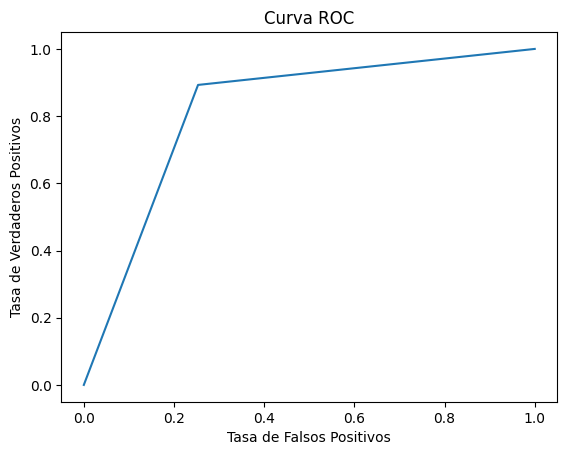

In [ ]:
# Obtener la gráfica ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.show()